In [31]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Look at proper nouns

In [ ]:
noun_chunk_sample = []
body_samples = modeling_data_df['body'].sample(10000)

In [ ]:
def get_proper_noun_chunks(body):
    doc = nlp(body)
    proper_nouns = []
    for word in doc:
        if word.pos_ == 'PROPN':
            proper_nouns.append(word.text)

    proper_noun_phrases = []
    for noun_chunk in doc.noun_chunks:
        if any(map(lambda x: x.pos_ == 'PROPN', noun_chunk)):
            proper_noun_phrases.append(noun_chunk.text)
    
    return [proper_nouns, proper_noun_phrases]

In [ ]:
proper_nouns = body_samples.swifter.apply(get_proper_noun_chunks)

In [3]:
proper_nouns = pickle.load(open('exploratory_analysis/proper_nouns.pkl', 'rb'))

In [9]:
noun_df = pd.DataFrame({
    'proper nouns': proper_nouns.apply(lambda x: x[0]),
    'noun chunks': proper_nouns.apply(lambda x: x[1])
})

In [12]:
from collections import Counter

In [14]:
noun_chunk_counter = Counter()
_ = noun_df['noun chunks'].apply(lambda x: noun_chunk_counter.update(x))

proper_noun_counter = Counter()
_ = noun_df['proper nouns'].apply(lambda x: proper_noun_counter.update(x))

noun_chunk_s = pd.Series(noun_chunk_counter).sort_values(ascending=False)
propn_s = pd.Series(proper_noun_counter).sort_values(ascending=False)

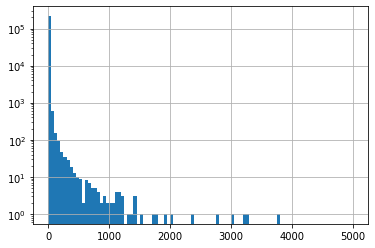

In [36]:
noun_chunk_s.hist(bins=100, log=True, range=(1,5000))

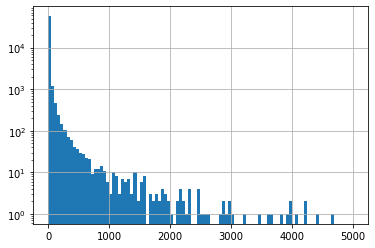

In [37]:
propn_s.hist(bins=100, log=True, range=(1, 5000))